# Assignment 1: Black-Scholes Model and Binomial Tree



## Part I:  *Option Valuation*

In [85]:
T = 1 # End time
M = 50 # number of steps
dt = T/M # step_size
r = 0.06 # interest rate
S = 100 # stock Price
K = 99 # strike Price
sigma = .2 # Volatility
M = 50 # Steps til T

a = np.exp(r*dt)
u = np.exp(sigma*np.sqrt(dt)) # up
d = 1/u # down
p = (a - d) / (u - d) # probability

### 1.1

In [86]:
# data matrix
data_dict = {}

T = 1
dt = T/M
r = 0.06
S = 100
K = 99
sigma = .2

M = 50    

a = np.exp(r*dt)
u = np.exp(sigma*np.sqrt(dt))
d = 1/u
p = (a - d) / (u - d)

W = np.zeros((M+1,1))

# asset price at time T
for n in range(0,M+1):
    W[n] = S*(u**(M-n))*(d**(n));

# option values at time T
for n in range(0,M+1):
    W[n] = max(W[n] - K,0)

# retrace to get option value at time zero
for i in range(M,0,-1):
    for n in range(0,i):
        W[n] = np.exp(-r*dt)*(p*W[n] + (1-p)*W[n+1])


print('Option value: ' +str(W[0][0]))
# print(data_dict)

Option value: 11.546434850755071


C:\Users\dirk_\AppData\Roaming\Python\Python36\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


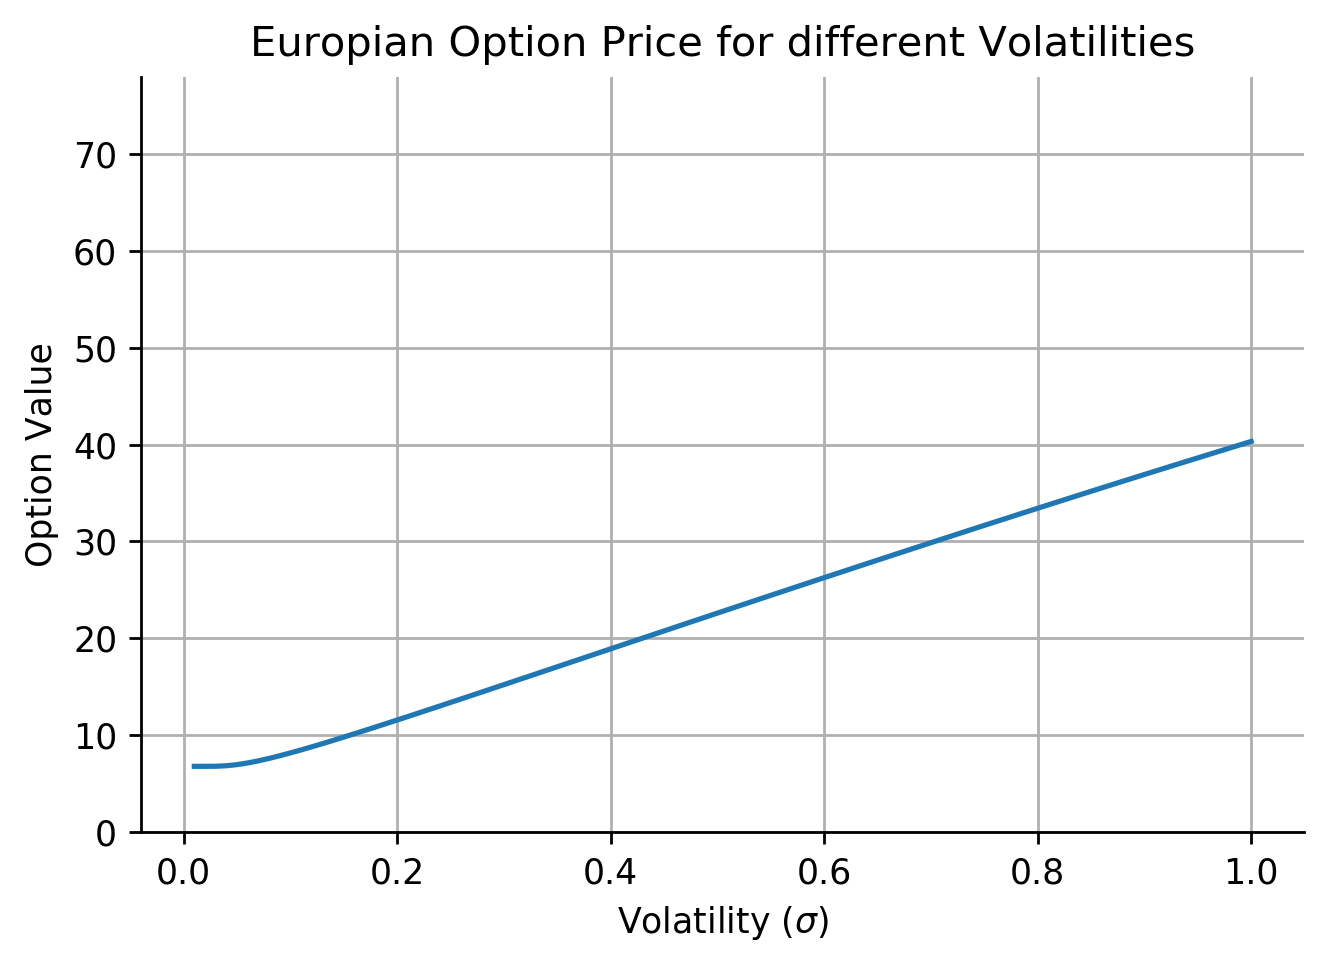

In [96]:
from ipykernel import kernelapp as app
import numpy as np
# data matrix
data_dict = {}
W = np.zeros((M+1,1))
M = 50

sigmas = np.linspace(0.01,1.0,100)
x = sigmas
y = []
for sigma in sigmas:
    
    a = np.exp(r*dt)
    u = np.exp(sigma*np.sqrt(dt))
    d = 1/u
    p = (a - d) / (u - d)
    
    # asset price at time T
    for n in range(0,M+1):
        W[n] = S*(u**(M-n))*(d**(n));
    
    # option values at time T
    for n in range(0,M+1):
        W[n] = max(W[n] - K,0)
    
    # retrace to get option value at time zero
    for i in range(M,0,-1):
        for n in range(0,i):
            W[n] = np.exp(-r*dt)*(p*W[n] + (1-p)*W[n+1])
        
    y.append(W[0][0])
#     data_dict[sigma] =  {"option_value" : W[0][0]}
    
# Plot Data
plt.figure(dpi=250)
plt.ylim([0,78])
ax = plt.subplot(111)
ax.plot(x,y)
ax.set_xlabel(r'Volatility ($\sigma$)')
ax.set_ylabel('Option Value')
ax.set_title('Europian Option Price for different Volatilities')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid()
plt.savefig('./images/EU_OptionPrice_Volatilities.png', bbox_inches='tight')
plt.show()


#     print('Option value for sigma='+str(sigma)+': '+str(W[0][0]))
# print(data_dict)

### 1.2

In [88]:
import time
import matplotlib.pyplot as plt
import matplotlib.axes as axes
import numpy as np
import array


T = 1 # End time
M = 50 # Number of steps
dt = T/M # Step_size
r = 0.06 # Interest rate
S = 100 # Stock Price
K = 99 # Strike Price
sigma = .2 # Volatility

Ms = array.array('i',(i for i in range(50,2000, 50)))

steps = []
for M in Ms:
    step = 0

    dt = T/M
    a = np.exp(r*dt)
    u = np.exp(sigma*np.sqrt(dt))
    d = 1/u
    p = (a - d) / (u - d)
    
    W = np.zeros((M+1,1))

    # asset price at time T
    for n in range(0,M+1):
        W[n] = S*(u**(M-n))*(d**(n));

    # option values at time T
    for n in range(0,M+1):
        W[n] = max(W[n] - K,0)
        step+=1
    
    # retrace to get option value at time zero
    for i in range(M,0,-1):
        for n in range(0,i):
            W[n] = np.exp(-r*dt)*(p*W[n] + (1-p)*W[n+1])
            step+=1
    
    
    steps.append(step)

In [89]:
# complexity = lambda N: N**2/2 + 2*(N+1)
# complexity = lambda N: N*((N+1)+2)/2
complexity = lambda N: N**2/2

comp = []
for i in Ms:
    comp.append(complexity(i))

    

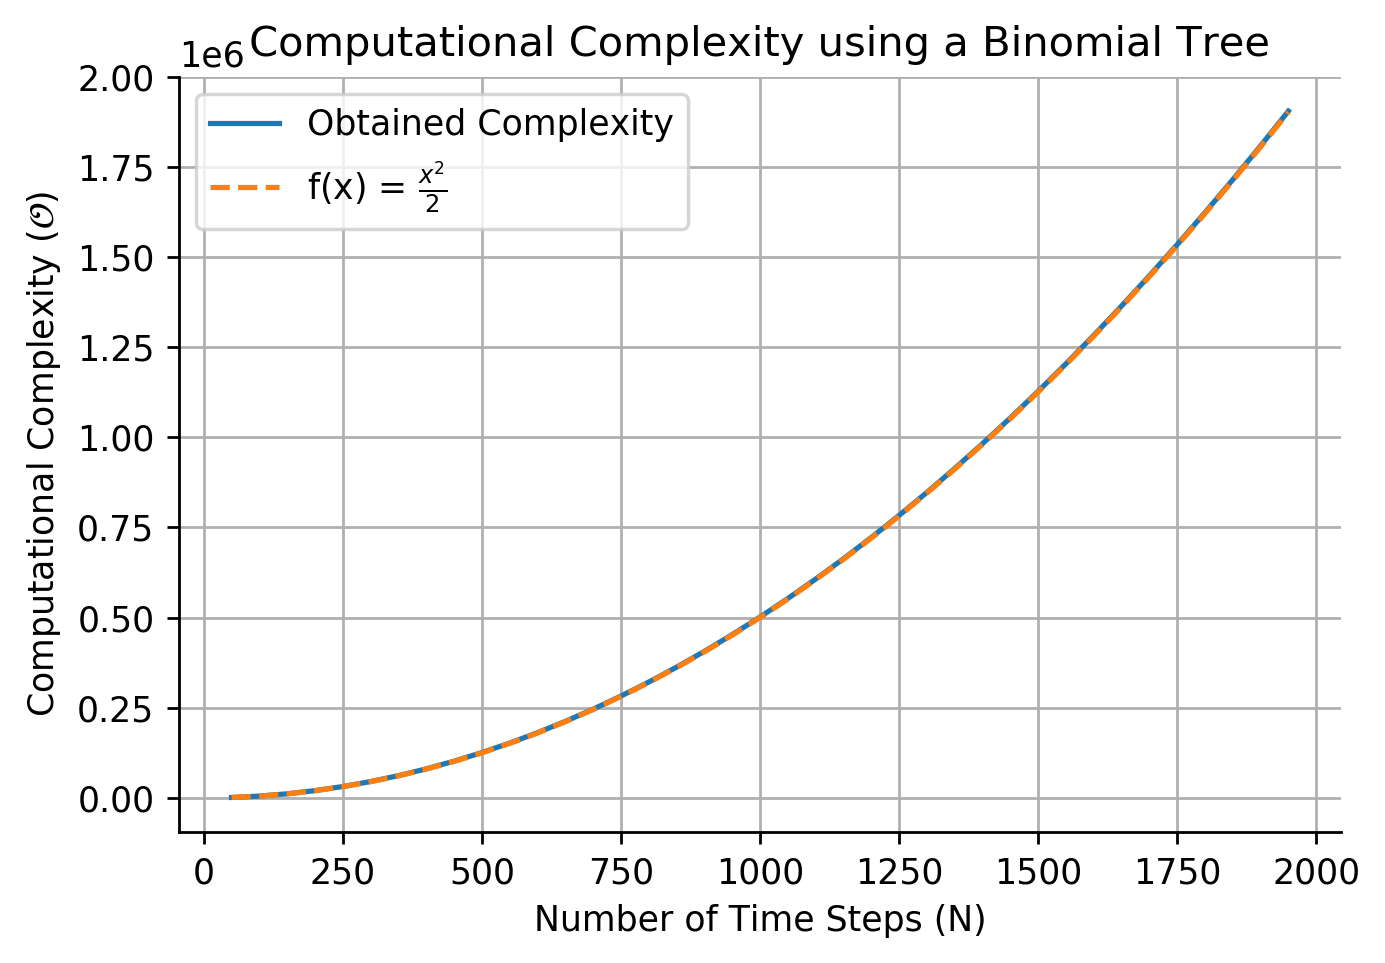

In [119]:
plt.figure(dpi=250)
ax = plt.subplot(111)
ax.plot(Ms,steps, label="Obtained Complexity")
ax.plot(Ms,comp,linestyle='--',label = r"f(x) = $\frac{x^{2}}{2}$")
ax.set_xlabel(r'Number of Time Steps (N)')
ax.set_ylabel(r'Computational Complexity ($\mathcal{O}$)')
ax.set_title('Computational Complexity using a Binomial Tree')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend()
ax.grid()
ax.axes.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
plt.savefig('./images/EU_Complexity.png', bbox_inches='tight')
plt.show()

Number of steps taken: $$\frac{ N((N + 1) + 2) }{2}$$ 

Complexity: $$\mathcal{O}(\frac{N^2}{2})$$

### 1.3


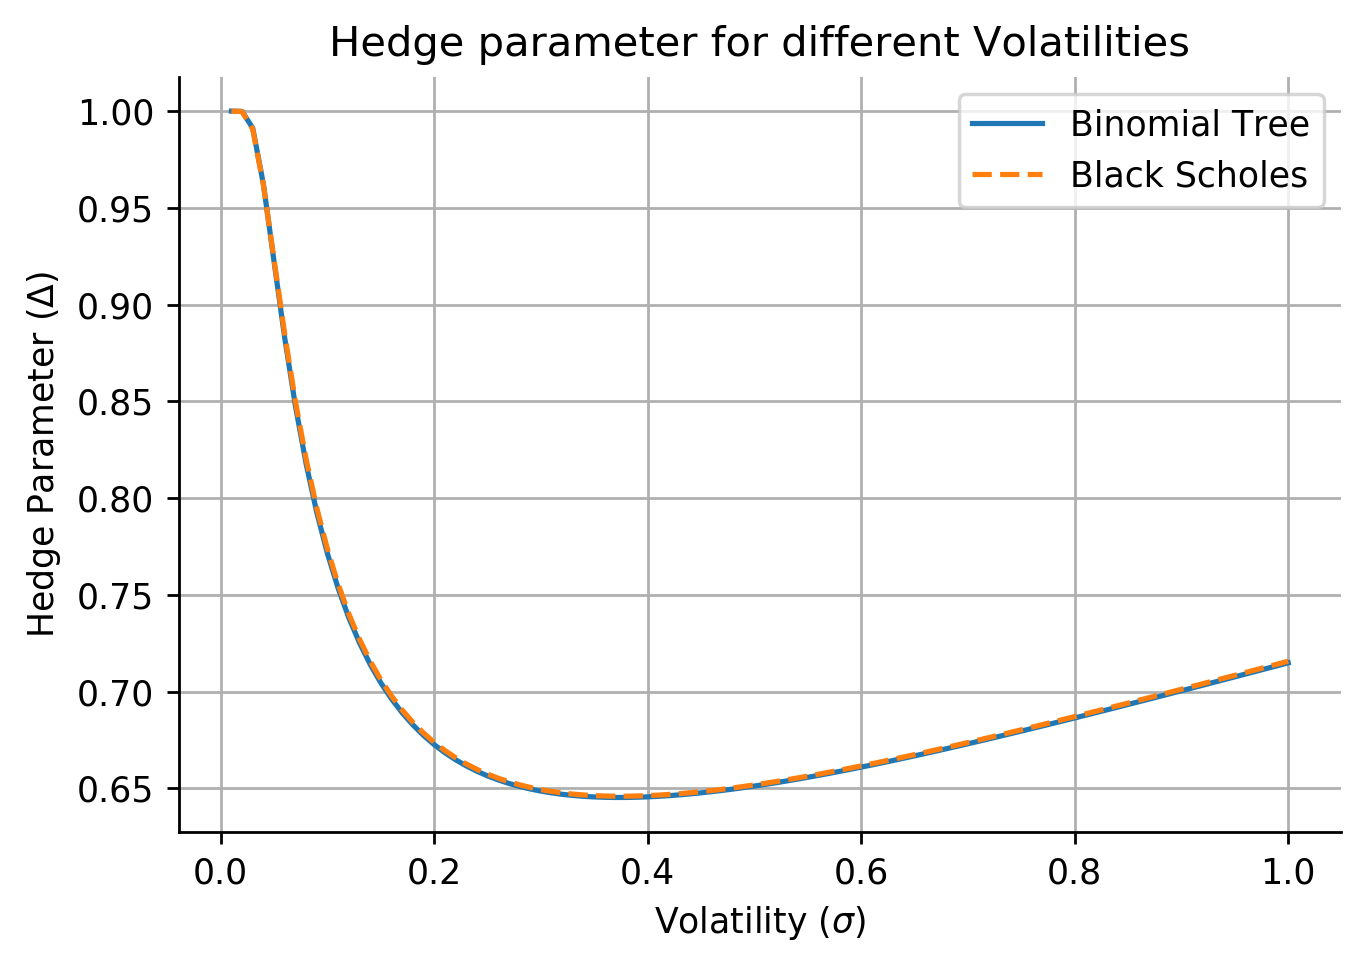

In [125]:
import matplotlib.pyplot as plt
T = 1 # End time
M = 50 # Number of steps
dt = T/M # Step_size
r = 0.06 # Interest rate
S = 100 # Stock Price
K = 99 # Strike Price
sigma = .2 # Volatility

W = np.zeros((M+1,1))

sigmas = np.linspace(0.01,1.0,100)
x = sigmas
BS_y = []
BT_y = []
for sigma in sigmas:
    a = np.exp(r*dt)
    u = np.exp(sigma*np.sqrt(dt))
    d = 1/u
    p = (a - d) / (u - d)

    # asset price at time T
    for n in range(0,M+1):
        W[n] = S*(u**(M-n))*(d**(n));

    # option values at time T
    for n in range(0,M+1):
        W[n] = max(W[n] - K,0)

    # retrace to get option value at time zero
    for i in range(M,0,-1):
        for n in range(0,i):
            W[n] = np.exp(-r*dt)*(p*W[n] + (1-p)*W[n+1])
            if i == 2 and n == 1:
                f_up = W[0]
                f_down = W[1]
                S_up = S*u
                S_down = S*d

                BT_delta = (f_up-f_down)/(S_up-S_down)

#     print("Binominal Tree Delta value: "+str(delta[0]))
    t = 0
    d1 = (1/sigma*np.sqrt(T-t))*(np.log(S/K)+(r+(sigma**2/2)*(T-t)))

    from scipy.stats import norm
    BS_delta = norm.cdf(d1)
    
    BS_y.append(BS_delta)
    BT_y.append(BT_delta)
#     print("Black-Scholes Delta value: "+str(norm.cdf(d1)))
plt.figure(dpi=250)
ax = plt.subplot(111)
ax.plot(x,BT_y,label='Binomial Tree')
ax.plot(x,BS_y,linestyle='--',label='Black Scholes')

ax.set_xlabel(r'Volatility ($\sigma$)')
ax.set_ylabel(r'Hedge Parameter ($\Delta$)')
ax.set_title('Hedge parameter for different Volatilities')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid()
ax.legend()
plt.savefig('./images/EU_Delta_Volatilities.png', bbox_inches='tight')
plt.show()

### 1.4

In [92]:
import time
import matplotlib.pyplot as plt
T = 1 # End time
M = 50 # Number of steps
dt = T/M # Step_size
r = 0.06 # Interest rate
S = 100 # Stock Price
K = 99 # Strike Price
sigma = .2 # Volatility

def calc_US_option_price(T,M,option):
    dt = T/M
    a = np.exp(r*dt)
    u = np.exp(sigma*np.sqrt(dt))
    d = 1/u
    p = (a - d) / (u - d)

    W = np.zeros((M+1,1))
    
    # asset price at time T
    for n in range(0,M+1):
        W[n] = S*(u**(M-n))*(d**(n));

    # option values at time T
    for n in range(0,M+1):
        W[n] = max(W[n] - K,0)

    if option == 'put':
        # retrace to get option value at time zero
        for i in range(M,0,-1):
            for n in range(0,i):
                W[n] = np.exp(-r*dt)*(p*W[n] + (1-p)*W[n+1])

                # PUT - Strike price - stock price at given t
                W[n] = max(K-S*(u**(i-n-1))*(d**n), W[n])
                
    elif option == 'call':
        for i in range(M,0,-1):
            for n in range(0,i):
                W[n] = np.exp(-r*dt)*(p*W[n] + (1-p)*W[n+1])

                # CALL
                W[n] = max(S*(u**(i-n-1))*(d**n)-K, W[n])

    return W[0][0]

print("The option price for a American call: " + str(calc_US_option_price(T,M,'call')))
print("The option price for a American put: " + str(calc_US_option_price(T,M,'put')))

# CALL SHOULD BE THE SAME
# PUT SHOULD BE DIFFERENT

The option price for a American call: 11.546434850755071
The option price for a American put: 16.656388744581253


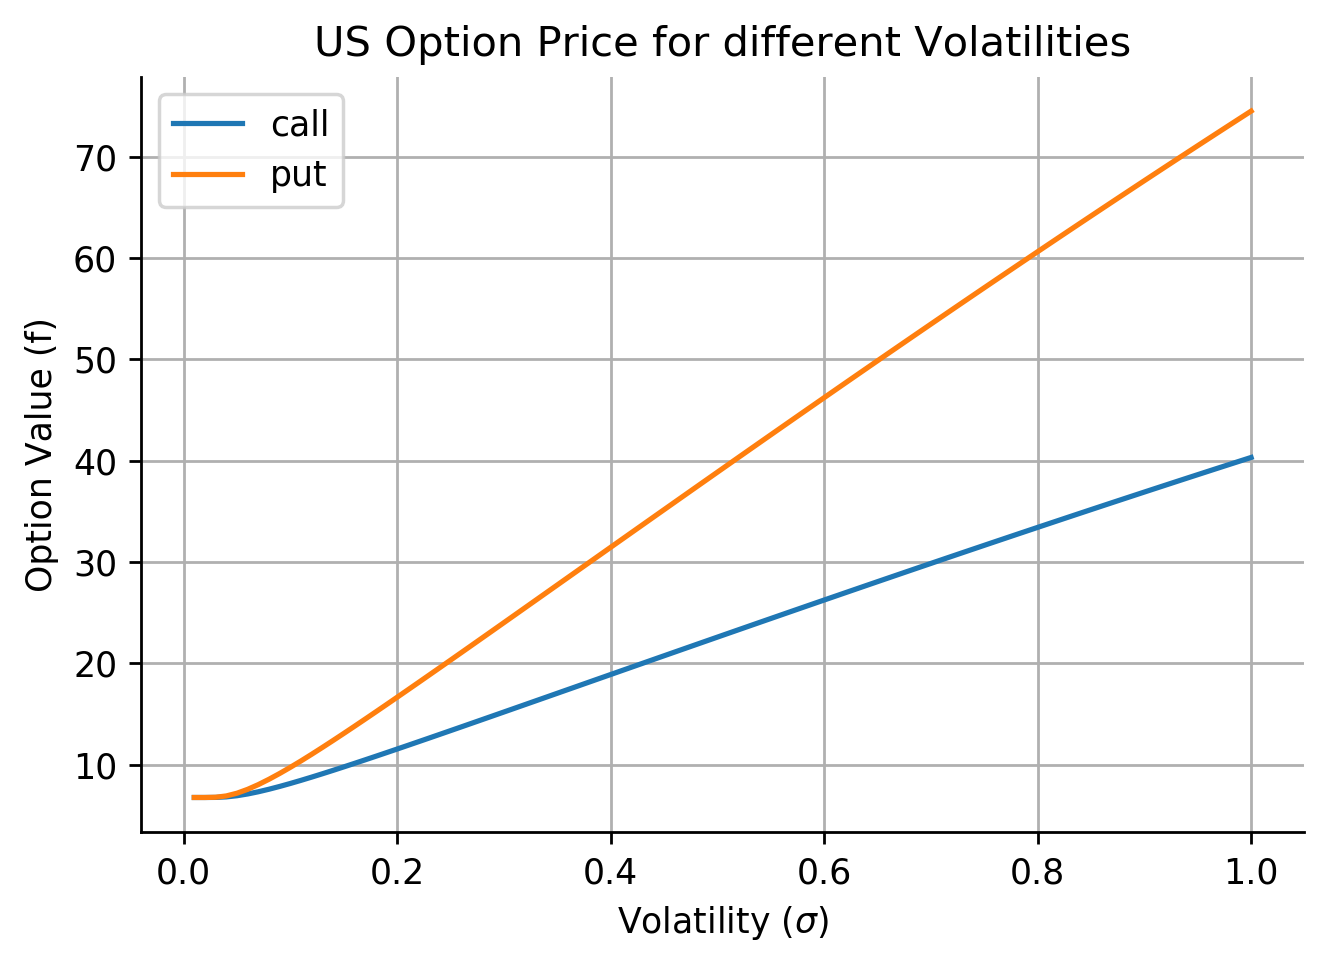

In [126]:
T = 1 # End time
M = 50 # Number of steps
dt = T/M # Step_size
r = 0.06 # Interest rate
S = 100 # Stock Price
K = 99 # Strike Price
# sigma = .2 # Volatility


sigmas = np.linspace(0.01,1.0,100)
x = sigmas
y_put = []
y_call = []
for sigma in sigmas:

    y_call.append(calc_US_option_price(T,M,'call'))
    y_put.append(calc_US_option_price(T,M,'put'))
    
plt.figure(dpi=250)
ax = plt.subplot(111)
ax.plot(x,y_call,label='call')
ax.plot(x,y_put,label='put')
ax.set_xlabel(r'Volatility ($\sigma$)')
ax.set_ylabel('Option Value (f)')
ax.set_title('US Option Price for different Volatilities')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid()
ax.legend()
plt.savefig('./images/US_OptionPrice_Volatilities.png', bbox_inches='tight')
plt.show()

## Part II:  *Hedging Simulations*

In [ ]:
# Stock price
S = 100
r = 0.06
sigma_option = 0.20
K = 99
T = 1
M = 364
dt = T / M

def random_numbers():
    epsilon = np.random.randn(M,1)
    return epsilon
    
def Stock_price_dynamics(S, epsilon):
    return r * S * dt + sigma * S * epsilon * np.sqrt(dt)

def d1(S):

    
    return (np.log(S/K) + (r + 0.5*sigma**2) * (dt)) / (sigma*np.sqrt(dt))



Stock_prices = []
Stock_prices.append(S)

epsilon = random_numbers()
delta = []


for i in range(1, M+1):
    
    Stock_prices.append(Stock_prices[i-1] + Stock_price_dynamics(Stock_prices[i-1], epsilon[i-1])[0])
    
    d11 = d1(Stock_prices[i-1])
    delta.append(norm.cdf(d11))


dt = T / (M/7)

# week_delta = np.zeros((M/7,1))
week_delta = []
for i in range(0, M+1, 7):
    d11 = d1(Stock_prices[i])
    week_delta.append(norm.cdf(d11))
print(week_delta)


